In [20]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

# 2.3.3 선형 모델

선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행합니다.

w[0]: 0.393906  b: -0.031804


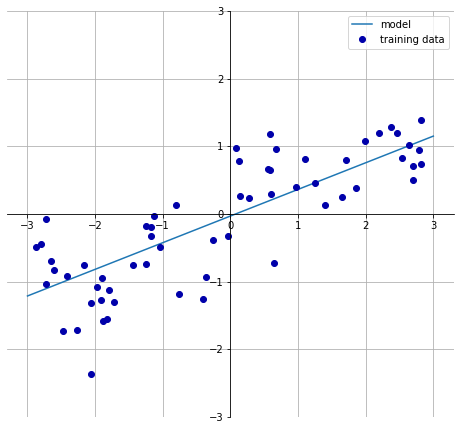

In [3]:
mglearn.plots.plot_linear_regression_wave()

특성이 많은 데이터셋이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다. 특히 훈련 데이터보다 특성이 더 많은 경우에는 어떤 타킷 y도 완벽하게 선형 함수로 모델링할 수 있습니다.

## 선형 모델

### 1. 선형 회귀(최소제곱법)

선형 회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘입니다. 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾습니다. 선형 회귀는 매개변수가 없는 것이 장점이지만 그래서 모델의 복잡도를 제어할 방법도 없습니다.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 한다. coef_ 속성에 저장되어 있다.
- 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있다.

In [5]:
print("lr.coef_ : ", lr.coef_)
print("lr.intercept_ : ", lr.intercept_)

lr.coef_ :  [0.39390555]
lr.intercept_ :  -0.031804343026759746


In [6]:
# 훈련 세트와 테스트 세트의 성능

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


점수는 좋지 않지만 점수가 비슷하므로 과대적합이 아니라 과소적합인 상태입니다. 이 예제는 1차원 데이터이기 때문에 단순하지만 특성이 많은 고차원 데이터셋에서는 선형 모델이 과대적합될 가능성이 높습니다.

보스턴 주택가격 데이터셋을 예로 한번 보겠습니다.

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
# 훈련 세트와 테스트 세트의 성능

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


보스턴 주택가격 예제를 보게되면 과대적합되었다는 것을 알 수 있습니다. 과대적합을 제아할 수 있는 모델을 사용하기 위해 기본 선형 회귀 방식 대신 리지 회귀 방식을 알아보겠습니다.

### 2. 리지 회귀

리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용화지만 리지 회귀에서의 가중치 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있습니다.

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


결과를 보면 LinearRegression보다 훈련세트 점수는 낮지만 테스트 세트에 대한 점수는 더 높은 것을 확인할 수 있습니다. Ridge는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있습니다. 기본은 alpha=1.0을 사용하지만 최적의 alpha값은 사용하는 데이터셋에 달려있습니다. alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있습니다.

In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지 조사해보자.

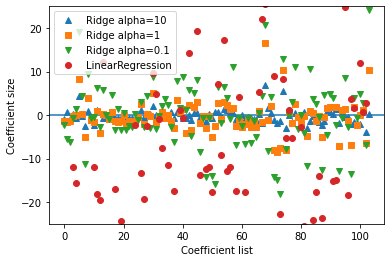

In [57]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient list")
plt.ylabel("Coefficient size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

x 축은 coef_의 원소를 위치대로 나열한 것입니다. x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수입니다. 이런식으로 x=100까지 계속됩니다.

규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것입니다.

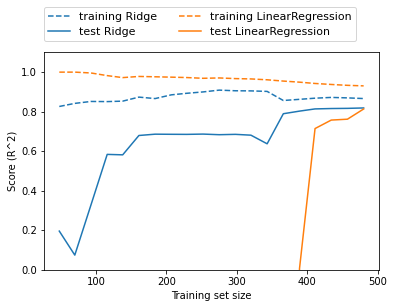

In [22]:
mglearn.plots.plot_ridge_n_samples()

이 그림을 살펴보면 데이터셋 크기가 400 미만에서는 선형회귀가 어떠한 학습도 못하고 있습니다. 그래도 알 수 있는 사실은 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이라는 점입니다.


### 3. 라소

선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있습니다.

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수:  4


Lasso는 훈련 세트와 테스트 세트 모두 결과가 좋지 않습니다. 이는 과소적합이며 104개의 특성 중 4개만 사용한 것을 볼 수 있습니다. Ridge처럼 alpha 매개변수를 지원하여 살펴보겠습니다.

In [39]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
# "max_iter"는 반복 실행하는 최대 횟수입니다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수:  33


In [27]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수:  96


Text(0, 0.5, 'Coefficient size')

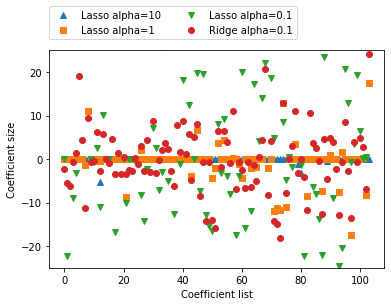

In [56]:
%matplotlib inline
plt.plot(lasso.coef_, '^', label="Lasso alpha=10")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.1")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient list")
plt.ylabel("Coefficient size")


실제로 이 두 모델 중 보통은 리지 회귀를 선호합니다. 하지만 특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수 있습니다.


### 4. 분류용 선형 모델

분류용 선형 모델에서는 결정 경계가 입력의 선형 함수입니다. 다른 말로 하면 선형분류기는 선, 평면, 초평면을 사용해서 두개의 클래스를 구분하는 분류기입니다.

선형 모델을 학습시키는 알고리즘은 다양한데 다음의 두 방법으로 구분할 수 있습니다.

- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

가장 널리 알려진 두 개의 선형 분류 알고리즘은 로지스틱 회귀와 서포트 벡터 머신입니다. 회귀라는 말이 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘이므로 혼동해서는 안된다.

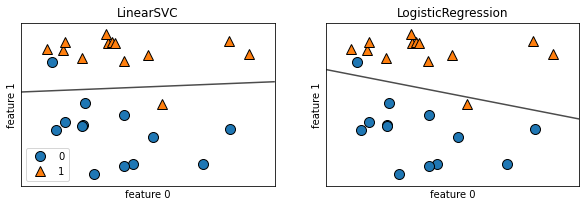

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend()
plt.show()

그림을 보면 결정 경계가 유사하게 만들어졌다는 것을 확인 할 수 있다. 직선을 기준으로 데이터가 위쪽에 생기면 클래스 1, 아래쪽으로 생기면 클래스 0으로 나뉜다. 

LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C입니다. C의 값이 높아지면 규제가 감소합니다. 다시 말해 매개변수로 높은 C 값을 지정하면 두 개의 모델은 훈련 세트에 가능한 최대로 맞추려 하고 반면에 C 값을 낮추면 모델은 계수 벡터(w)가 0에 가까워 집니다.

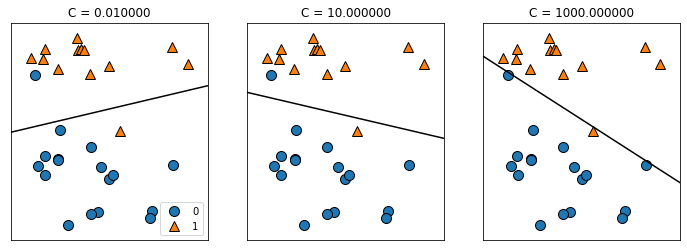

In [61]:
mglearn.plots.plot_linear_svc_regularization()

C 의 값에 따라 나온 그림이다. 값을 크게 줄 수록 결정 경계의 기울기가 달라진다. 오른쪽의 그림은 과대적합된 것 같습니다. 

유방암 데이터셋을 사용해서 LogisticRegression을 좀 더 자세히 보겠습니다.

In [63]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수 :{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 :{:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 :0.955
테스트 세트 점수 :0.958


기본값 C=1에서 훈련과 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것 같습니다. C를 증가시켜보겠습니다.

In [76]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수 :{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 :{:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 :0.944
테스트 세트 점수 :0.958


책에서는 C의 값을 늘렸을 때 훈련세트와 테스트 세트의 정확도가 증가했지만 버전의 차이인지 오히려 훈련 세트의 정확도는 떨어졌습니다. 책에 따르면 복잡도가 높은 모델일수록 성능이 좋음을 말해줍니다.

In [77]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수 :{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 :{:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 :0.937
테스트 세트 점수 :0.930


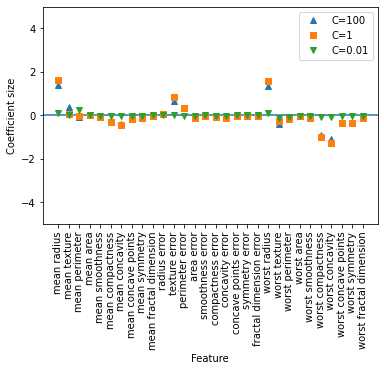

In [79]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient size")
plt.legend()

이 그림은 유방암 데이터셋에 각기 다른 C 값을 사용하여 만든 로지스틱 회귀의 계수입니다. 로지스틱 회귀는 기본으로 L2 규제를 적용합니다. 더 이해하기 쉬운 모델을 원한다면 L1 규제를 사용하는 것이 좋습니다.

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


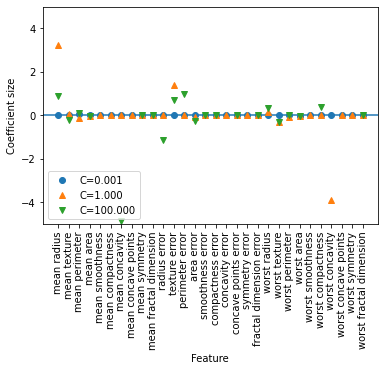

In [84]:
# L1 규제를 사용할 떄의 분류 정확도와 계수 그래프

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1").fit(X_train, y_train)
    
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
        C, lr_l1.score(X_test, y_test))) 
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    

plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient size")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

### 5. 다중 클래스 분류용 선형 모델

로지스틱 회귀만 제외하고 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원합니다. 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다. 결국 클래스의 수만큼 이진 분류 모델이 만들어집니다.

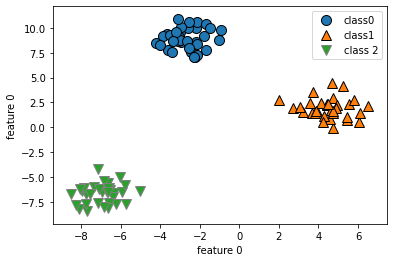

In [86]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 0")
plt.legend(["class 0", "class 1", "class 2"])
plt.show()

In [89]:
# LinearSVC 분류기 훈련

linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 :", linear_svm.coef_.shape)
print("절편 배열의 크기 :", linear_svm.intercept_.shape)

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


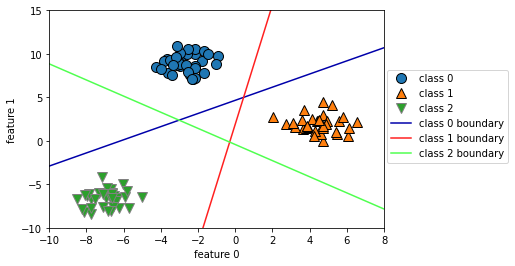

In [93]:
# 세 개의 이진 분류기가 만드는 경계를 시각화

mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, - (line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))
plt.show()

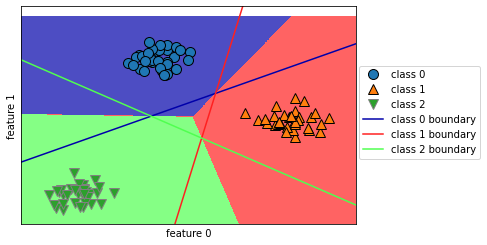

In [94]:
# 2차원 평면의 모든 포인트에 대한 예측 결과를 보자.

mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, - (line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))
plt.show()

### 장단점과 매개변수

선형모델의 주요 매개변수

- 회귀 모델 : alpha

- LinearSVC, LogisticRegression : C

alpha값이 클수록, C 값이 작을수록 모델이 단순해집니다. 회귀모델에서는 이 매개변수를 조정하는 일이 매우 중요합니다. 중요한 특성이 많다면 L2 규제를 사용, 많지 않다면 L1규제 사용해야합니다.

선형 모델의 장점은 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다. 하지만 데이터셋 특성들이 서로 연관이 깊다면 계수의 값들이 왜 그런지 명확하게 알기는 힘들 때가 있습니다.